In [1]:
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np
from IPython.display import SVG
from sklearn.externals import joblib
from ann_visualizer.visualize import ann_viz;
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, classification_report, roc_curve, precision_recall_curve, confusion_matrix, f1_score, average_precision_score, cohen_kappa_score
from inspect import signature
from sklearn.externals import joblib
from matplotlib import pyplot
from collections import Counter


C:\Users\Pappa\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


## 1. Prepare Data

In [2]:
X_train_resampled = pd.read_csv("../3. Data Preparation/X_train_resampled.csv", index_col=0)
X_train_resampled.shape

(1848, 30)

In [3]:
y_train_resampled = pd.read_csv("../3. Data Preparation/y_train_resampled.csv", index_col=0)
y_train_resampled.shape

(1848, 1)

In [4]:
X_val = pd.read_csv("../3. Data Preparation/X_val.csv", index_col=0)
X_val.shape

(56962, 30)

In [5]:
y_val = pd.read_csv("../3. Data Preparation/y_val.csv", index_col=0)
y_val.shape

(56962, 1)

In [6]:
fourfeatures = pd.read_csv('../12. Final Evaluate/4 ImportantFeaturesFinal.csv', index_col=0)
fourfeatures.shape

(4, 1)

In [15]:
fourfeatures.index.values

array([0, 1, 2, 3], dtype=int64)

In [7]:
X_train_resampled = X_train_resampled[['V9','V16','V11','V12','V13','V2','V21','V25','V23','V5']]


In [8]:
 X_train_resampled.shape[1]


10

In [9]:
X_val = X_val[['V9','V16','V11','V12','V13','V2','V21','V25','V23','V5']]

In [10]:
X_val.shape

(56962, 10)

## 2. Find the best number of neurons through the recall value

In [12]:
from keras import backend as K
def recall(y_true, y_pred): 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall


best_score_sl = actual_score = 0 #single layer
best_i_sl = 0
for i in range(1,20,1):
    print('Enter in:', i)
    model = Sequential()
    model.add(Dense(i, input_dim=X_train_resampled.shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', recall])
    history = model.fit(X_train_resampled.values, y_train_resampled.values, 
                    validation_data=(X_val.values, y_val['Class'].values),
                    epochs=150, batch_size=10, verbose=False)
    actual_score = np.mean(history.history['val_recall'])
    if actual_score > best_score_sl:
        best_score_sl = actual_score
        best_i_sl = i
    print("I: ", i, "Best_I: ",best_i_sl,"Best_Score: ", best_score_sl,"Actual_Score: ", actual_score)
print("Best_I: ",best_i_sl,"Best_Score: ", best_score_sl)

Enter in: 1
I:  1 Best_I:  1 Best_Score:  0.01212504098052709 Actual_Score:  0.01212504098052709
Enter in: 2
I:  2 Best_I:  2 Best_Score:  0.01418021201931141 Actual_Score:  0.01418021201931141
Enter in: 3
I:  3 Best_I:  2 Best_Score:  0.01418021201931141 Actual_Score:  0.01307070054734812
Enter in: 4
I:  4 Best_I:  2 Best_Score:  0.01418021201931141 Actual_Score:  0.013920389712585829
Enter in: 5
I:  5 Best_I:  5 Best_Score:  0.014324167621686392 Actual_Score:  0.014324167621686392
Enter in: 6
I:  6 Best_I:  6 Best_Score:  0.01448567878532662 Actual_Score:  0.01448567878532662
Enter in: 7
I:  7 Best_I:  6 Best_Score:  0.01448567878532662 Actual_Score:  0.014317145397180297
Enter in: 8
I:  8 Best_I:  6 Best_Score:  0.01448567878532662 Actual_Score:  0.014345234295204682
Enter in: 9
I:  9 Best_I:  6 Best_Score:  0.01448567878532662 Actual_Score:  0.01439907134975142
Enter in: 10
I:  10 Best_I:  6 Best_Score:  0.01448567878532662 Actual_Score:  0.0144119454280126
Enter in: 11
I:  11 Best

## 3. Neural Network with number of neurons equal to 14

In [13]:
clf = Sequential([
    Dense(14, kernel_initializer='uniform', input_dim=X_train_resampled.shape[1], activation='relu'),
    Dense(1, kernel_initializer='uniform', activation='sigmoid')
])

clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',recall])
clf.fit(X_train_resampled, y_train_resampled['Class'].values, batch_size=15, epochs=350) 
clf.summary()

Epoch 1/350
1848/1848 [==============================] - 1s 456us/step - loss: 0.6165 - acc: 0.9275 - recall: 0.6556
Epoch 2/350
1848/1848 [==============================] - 0s 68us/step - loss: 0.3809 - acc: 0.9616 - recall: 0.7095
Epoch 3/350
1848/1848 [==============================] - 0s 73us/step - loss: 0.2215 - acc: 0.9637 - recall: 0.7423
Epoch 4/350
1848/1848 [==============================] - 0s 71us/step - loss: 0.1610 - acc: 0.9654 - recall: 0.7564
Epoch 5/350
1848/1848 [==============================] - 0s 67us/step - loss: 0.1387 - acc: 0.9665 - recall: 0.7611
Epoch 6/350
1848/1848 [==============================] - 0s 65us/step - loss: 0.1285 - acc: 0.9675 - recall: 0.7196
Epoch 7/350
1848/1848 [==============================] - 0s 63us/step - loss: 0.1231 - acc: 0.9675 - recall: 0.7018
Epoch 8/350
1848/1848 [==============================] - 0s 62us/step - loss: 0.1199 - acc: 0.9665 - recall: 0.7844
Epoch 9/350
1848/1848 [==============================] - 0s 61us/step -

1848/1848 [==============================] - 0s 70us/step - loss: 0.0836 - acc: 0.9746 - recall: 0.7727
Epoch 72/350
1848/1848 [==============================] - 0s 62us/step - loss: 0.0834 - acc: 0.9740 - recall: 0.8057
Epoch 73/350
1848/1848 [==============================] - 0s 64us/step - loss: 0.0830 - acc: 0.9740 - recall: 0.8143
Epoch 74/350
1848/1848 [==============================] - 0s 58us/step - loss: 0.0828 - acc: 0.9740 - recall: 0.8176
Epoch 75/350
1848/1848 [==============================] - 0s 59us/step - loss: 0.0826 - acc: 0.9740 - recall: 0.8185
Epoch 76/350
1848/1848 [==============================] - 0s 60us/step - loss: 0.0825 - acc: 0.9729 - recall: 0.8090
Epoch 77/350
1848/1848 [==============================] - 0s 62us/step - loss: 0.0824 - acc: 0.9751 - recall: 0.7804
Epoch 78/350
1848/1848 [==============================] - 0s 61us/step - loss: 0.0817 - acc: 0.9751 - recall: 0.7982
Epoch 79/350
1848/1848 [==============================] - 0s 61us/step - loss

1848/1848 [==============================] - 0s 61us/step - loss: 0.0696 - acc: 0.9773 - recall: 0.8068
Epoch 210/350
1848/1848 [==============================] - 0s 61us/step - loss: 0.0698 - acc: 0.9762 - recall: 0.8159
Epoch 211/350
1848/1848 [==============================] - 0s 61us/step - loss: 0.0695 - acc: 0.9767 - recall: 0.8239
Epoch 212/350
1848/1848 [==============================] - 0s 61us/step - loss: 0.0693 - acc: 0.9789 - recall: 0.8160
Epoch 213/350
1848/1848 [==============================] - 0s 61us/step - loss: 0.0691 - acc: 0.9756 - recall: 0.8402
Epoch 214/350
1848/1848 [==============================] - 0s 60us/step - loss: 0.0691 - acc: 0.9778 - recall: 0.8454
Epoch 215/350
1848/1848 [==============================] - 0s 60us/step - loss: 0.0693 - acc: 0.9778 - recall: 0.8390
Epoch 216/350
1848/1848 [==============================] - 0s 61us/step - loss: 0.0689 - acc: 0.9778 - recall: 0.7988
Epoch 217/350
1848/1848 [==============================] - 0s 60us/ste

1848/1848 [==============================] - 0s 60us/step - loss: 0.0616 - acc: 0.9811 - recall: 0.8401
Epoch 348/350
1848/1848 [==============================] - 0s 60us/step - loss: 0.0621 - acc: 0.9794 - recall: 0.8348
Epoch 349/350
1848/1848 [==============================] - 0s 60us/step - loss: 0.0616 - acc: 0.9805 - recall: 0.8371
Epoch 350/350
1848/1848 [==============================] - 0s 60us/step - loss: 0.0614 - acc: 0.9811 - recall: 0.8244
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 14)                154       
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 15        
Total params: 169
Trainable params: 169
Non-trainable params: 0
_________________________________________________________________


In [14]:
score = clf.evaluate(X_val, y_val, batch_size=128)
print('\nAnd the Score is ', score[1] * 100, '%')

56962/56962 [==============================] - 1s 9us/step

And the Score is  98.83957726203434 %


In [15]:
y_pred = clf.predict(X_val)

In [16]:
rounded = [round(x[0]) for x in y_pred]

In [17]:
sum(rounded)

732.0

## 4. Confusion Matrix

In [18]:
from sklearn.metrics import confusion_matrix

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


np.set_printoptions(precision=2)

In [19]:
from sklearn.metrics import classification_report

Confusion matrix, without normalization
[[56217   648]
 [   13    84]]


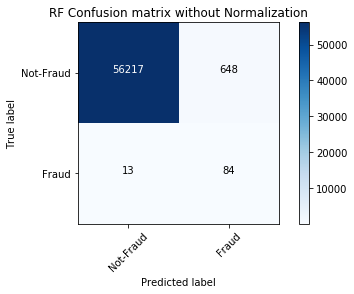

Normalized confusion matrix
[[0.99 0.01]
 [0.13 0.87]]


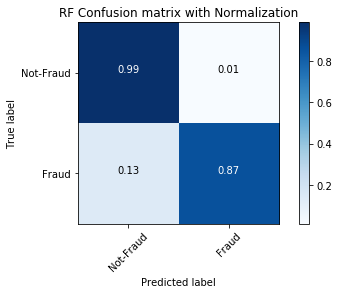

In [20]:
cm = confusion_matrix(y_val['Class'].values, rounded)

class_names = ['Not-Fraud','Fraud']
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names , 
                      title = 'RF Confusion matrix without Normalization')
plt.show()

plot_confusion_matrix(cm, 
                      classes = class_names , 
                      normalize = True,
                      title = 'RF Confusion matrix with Normalization')
plt.show()

## 5. Metrics Scores

In [21]:
target_names = ['Not Fraud 0', 'Fraud 1']
print(classification_report(y_val, rounded, target_names=target_names))

              precision    recall  f1-score   support

 Not Fraud 0       1.00      0.99      0.99     56865
     Fraud 1       0.11      0.87      0.20        97

    accuracy                           0.99     56962
   macro avg       0.56      0.93      0.60     56962
weighted avg       1.00      0.99      0.99     56962



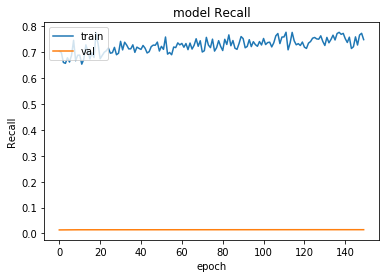

In [22]:
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title('model Recall')
plt.ylabel('Recall')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

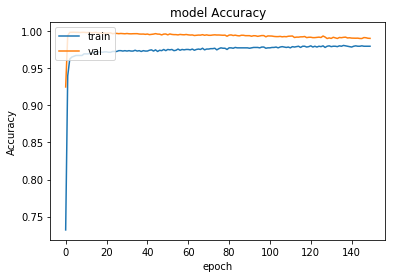

In [23]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [24]:
total1=sum(sum(cm))


sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

Sensitivity :  0.9886045898179899
Specificity :  0.865979381443299


In [25]:

acc= accuracy_score( y_val['Class'].values, rounded)
recall = recall_score( y_val['Class'].values, rounded, average='binary')
precision = precision_score( y_val['Class'].values, rounded)
f1 = f1_score( y_val['Class'].values, rounded, average='binary')
average = average_precision_score( y_val['Class'].values, rounded)
kappa = cohen_kappa_score( y_val['Class'].values, rounded)

print('Accuracy', acc)
print('Recall score', recall)
print('Precision', precision)
print('f1_score', f1)
print ('Average precision-recall score: {0:0.2f}'.format(average))
print('Kappa Score', kappa)

Accuracy 0.9883957726203434
Recall score 0.865979381443299
Precision 0.11475409836065574
f1_score 0.20265379975874548
Average precision-recall score: 0.10
Kappa Score 0.200248728267872


In [26]:
ann_viz(clf, title="Artificial Neural network with specific features")

Text(0.5,1,'Precision-Recall curve: AP=0.10')

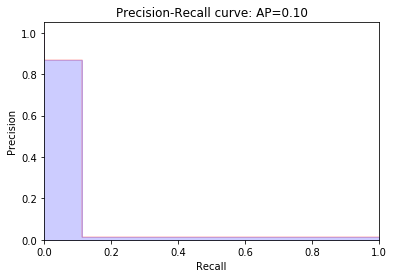

In [27]:
# plot precision-recall score


precision, recall, _ = precision_recall_curve(rounded, y_val['Class'].values)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(
          average))

In [28]:
def plot_roc():
    plt.plot(fpr, tpr, label = 'ROC curve' , linewidth = 2, color= 'darkorange')
    plt.plot([0,1],[0,1], 'k--', linewidth = 2, color ='navy', linestyle='--')
    plt.xlim([0.0,0.001])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show();

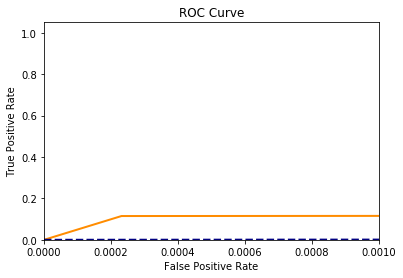

In [29]:
fpr, tpr, t = roc_curve(rounded, y_val['Class'].values)
plot_roc()

## 6. Save Model

In [30]:
joblib.dump(clf, 'Neural Network all Features.pkl') 

['Neural Network all Features.pkl']